# Analyzing Economic Indicators with the FRED API



In [1]:
# import relevant packages 
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt

## Problem 1

Ensure access to the FRED API. Apply your individual `API key`.

### Solution

In [2]:
# get API Key saved as an environment variable
import os 
api_key = os.getenv('fred_key')

fred = Fred(api_key=api_key)

## Problem 2

Retrieve data for the three economic indicators starting from 2001-01-01: 

* GDP (Gross Domestic Product): Series ID `GDP`
* Unemployment Rate: Series ID `UNRATE`
* Consumer Price Index (CPI) for All Urban Consumers: Series ID `CPIAUCSL`

What do you note about the data-frequency?

### Solution


In [3]:
series_ids = ['GDP', 'UNRATE', 'CPIAUCSL']
data = [fred.get_series(id, '2000-01-01') for id in series_ids]

data = pd.concat(data, axis=1)
data.columns = ['GDP', 'Unemployment Rate', 'CPI']

In [4]:
data.head()

,GDP,Unemployment Rate,CPI
2000-01-01,10002.179,4.0,169.3
2000-02-01,NaN,4.1,170.0
2000-03-01,NaN,4.0,171.0
2000-04-01,10247.720,3.8,170.9
2000-05-01,NaN,4.0,171.2


## Problem 3

Plot the three variables using line-plots.  

### Solution

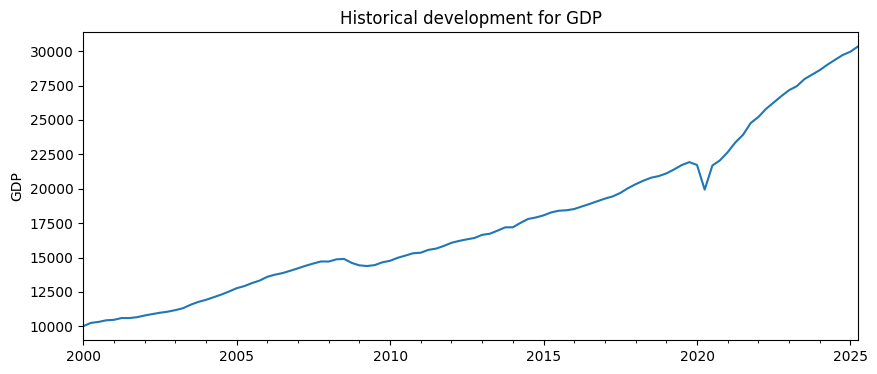

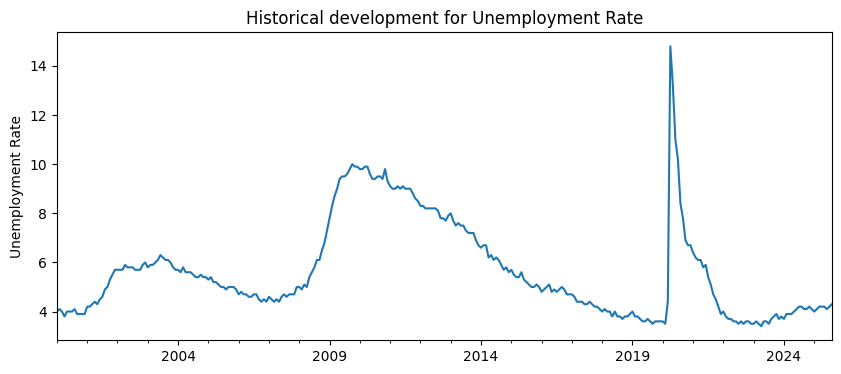

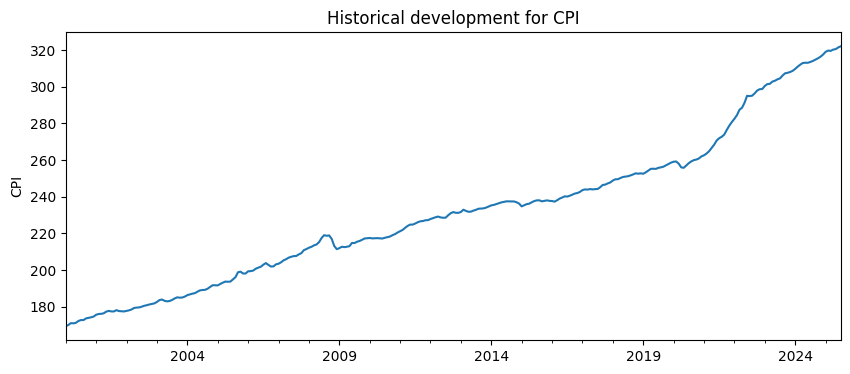

In [5]:
for name in data.columns: 

    fig, ax = plt.subplots(figsize=(10, 4))

    data[name].dropna().plot(ax=ax)
    ax.set(title="Historical development for {}".format(name), ylabel=name)

    plt.show()

## Problem 4

Calculate the quarterly growth rate for GDP and the annual inflation rate from the CPI data. Plot the growth rates using a line-plot. 

### Solution 

C:\Users\johan\AppData\Local\Temp\ipykernel_30272\180451305.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_inflation = data['CPI'].pct_change(12).dropna() * 100


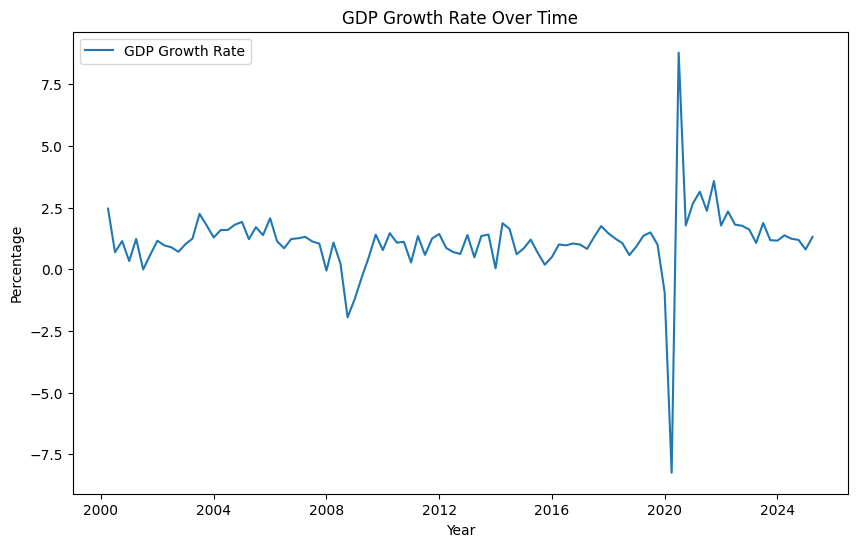

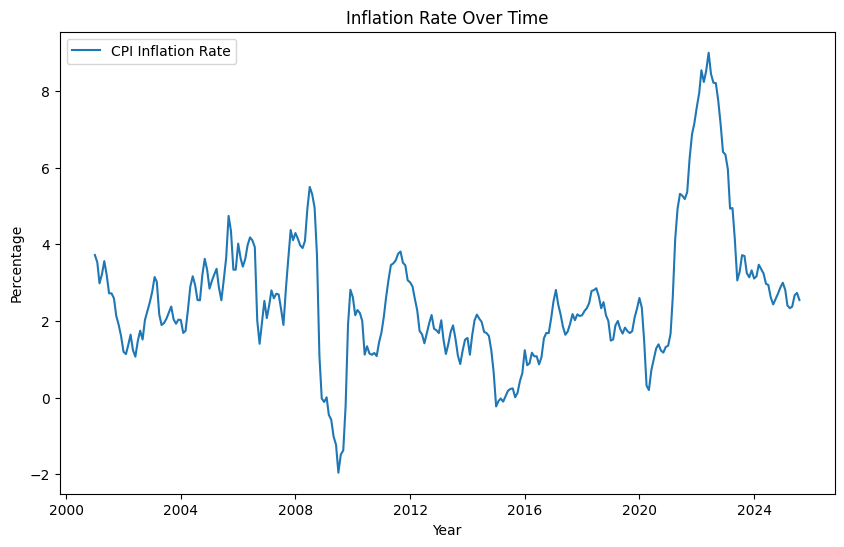

In [6]:
gdp_growth = data['GDP'].dropna().pct_change() * 100
cpi_inflation = data['CPI'].pct_change(12).dropna() * 100

# Plot GDP growth rate
plt.figure(figsize=(10, 6))
plt.plot(gdp_growth, label='GDP Growth Rate')
plt.title('GDP Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Plot CPI-based inflation rate
plt.figure(figsize=(10, 6))
plt.plot(cpi_inflation, label='CPI Inflation Rate')
plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show()